<h1>Students and their Scores</h1>

<p>Today we are going to work with a dataset from <a href='https://www.kaggle.com/datasets/mexwell/student-scores'>Kaggle</a> containing the information about a group of students and their scores for various subjects.</p>

<p>First let's import the libraries that we are going to use.</p>

In [120]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import levene

<p>Let us import the csv document and study the data that are going to explore.</p>

<p>The dataset contains the names and surnames of students, their email addresses, genders, weekly self-study hours, scores for various subjects, career aspirations, absence days and whether the student take part in any extracurricular activities and have a part-time job.</p>

In [121]:
scores=pd.read_csv("scores.csv")
print(scores.columns)

display(scores.head())

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')


,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


<p>For our analysis, we would not need the names and emails of students, moreover, for convenience, we can transform the data in the gender column into 0's and 1's.</p>

In [122]:
scores=scores[['id','gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score']]
gender_map = {'male': 0, 'female': 1}
scores.gender = scores.gender.map(gender_map)
score_columns = ['math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score']
scores['average_score'] = scores[score_columns].mean(axis=1).astype(int)

display(scores.head())

,id,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
0,1,0,False,3,False,27,Lawyer,73,81,93,97,63,80,87,82
1,2,1,False,2,False,47,Doctor,90,86,96,100,90,88,90,91
2,3,1,False,9,True,13,Government Officer,81,97,95,96,65,77,94,86
3,4,1,False,5,False,3,Artist,71,74,88,80,89,63,86,78
4,5,0,False,5,False,10,Unknown,84,77,65,65,80,74,76,74


<p>Looking at the data using describe() method we notice that we won't have to deal with missing data this time. Moreover, we check that the data types match our expectations.</p>

In [123]:
display(scores.describe())
scores.dtypes


,id,gender,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000
mean,1000.500000,0.501000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000,80.55850
std,577.494589,0.500124,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705,6.05342
min,1.000000,0.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000,59.00000
25%,500.750000,0.000000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000,77.00000
50%,1000.500000,1.000000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000,81.00000
75%,1500.250000,1.000000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000,84.00000
max,2000.000000,1.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000,96.00000


id                             int64
gender                         int64
part_time_job                   bool
absence_days                   int64
extracurricular_activities      bool
weekly_self_study_hours        int64
career_aspiration             object
math_score                     int64
history_score                  int64
physics_score                  int64
chemistry_score                int64
biology_score                  int64
english_score                  int64
geography_score                int64
average_score                  int64
dtype: object

<p>The first thing we can look at is whether male and female students have similar tastes when it comes to career choices. Grouping our dataset by gender and career aspirations, we can obtain the table containing the numbers of girls and boys wishing to pursue each career.</p>

In [124]:
fs=scores[scores.gender==1]
ms=scores[scores.gender==0]

f_asp=fs.groupby('career_aspiration')['id'].count().sort_values(ascending=False)
f_asp=f_asp.reset_index(name='count')
m_asp=ms.groupby('career_aspiration')['id'].count().sort_values(ascending=False)
m_asp=m_asp.reset_index(name='count')


df_aspirations = pd.merge(f_asp, m_asp, on='career_aspiration', how='outer')
df_aspirations.fillna(0, inplace=True)
df_aspirations.columns=['career_aspiration','female_count','male_count']
print(df_aspirations)




        career_aspiration  female_count  male_count
0          Business Owner         164.0       145.0
1       Software Engineer         141.0       174.0
2                 Unknown         109.0       114.0
3                  Banker         103.0        66.0
4                  Lawyer          66.0        72.0
5              Accountant          64.0        62.0
6                 Teacher          59.0         0.0
7                  Doctor          53.0        66.0
8   Real Estate Developer          45.0        38.0
9                  Artist          42.0        25.0
10               Designer          32.0        24.0
11         Game Developer          31.0        32.0
12     Government Officer          31.0        30.0
13         Stock Investor          25.0        48.0
14              Scientist          19.0        20.0
15                 Writer          18.0        14.0
16  Construction Engineer           0.0        68.0


<p>The results are visualized in the bar plot below. We can see that the tastes are somewhat similar, except for teachers and construction engineers.</p>

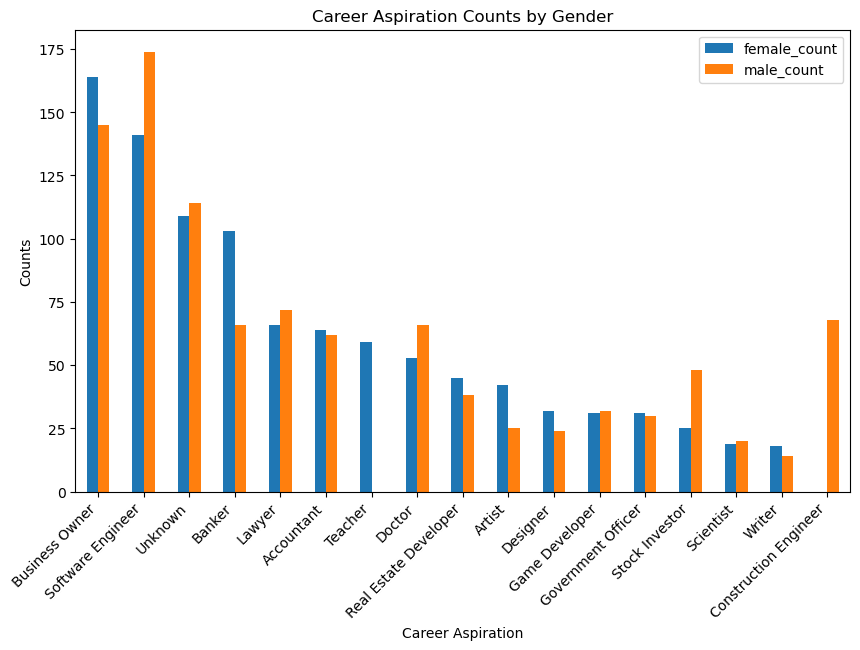

In [125]:
ax = df_aspirations.plot(kind='bar', x='career_aspiration', y=['female_count', 'male_count'], figsize=(10, 6))
ax.set_title('Career Aspiration Counts by Gender')
ax.set_xlabel('Career Aspiration')
ax.set_ylabel('Counts')
plt.xticks(rotation=45, ha="right")
plt.show()

<p>We could also look at the average scores of female and male students and see whether there is a statistically significant difference. Plotting the histograms after logarithmic tranformation of the data, we can see that the data is pretty close to normally distributed, and the variances are equal, so we can perform a 2-sample t-test. </p>

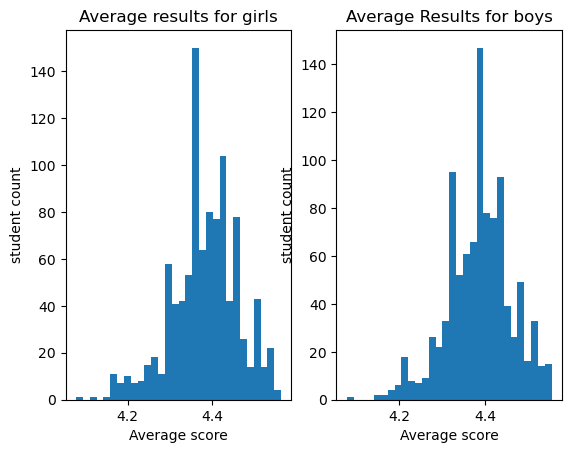

0.0059610137352310915
0.005633443423975499


In [126]:
plt.subplot(1,2,1)
plt.hist(np.log(fs.average_score),bins=30)
plt.xlabel('Average score')
plt.ylabel('student count')
plt.title('Average results for girls')

plt.subplot(1,2,2)
plt.hist(np.log(ms.average_score),bins=30)
plt.xlabel('Average score')
plt.ylabel('student count')
plt.title('Average Results for boys')


plt.show()

print(np.log(fs.average_score).var())
print(np.log(ms.average_score).var())

<p>Based on the p-value obtained by the 2-sample t-test we can conclude that there is no statistically significant difference in average scores for female and male students.</p>

In [127]:
from scipy.stats import ttest_ind

# Assume group1 and group2 are arrays or lists containing the data for the two groups
group1 = np.log(fs.average_score)
group2 = np.log(ms.average_score)

# To perform a two-sample t-test with the assumption of equal variances
t_stat, p_value = ttest_ind(group1, group2, equal_var=True)

print(p_value)


0.5314033099396682


<p>Enough with the gender comparisons. Next step -- let us check whether having a part-time job affects the studies. After plotting the boxplots for average scores in each of the groups, we see that there might indeed be a difference. The mean average results differ by 3 points (81 for students that do not work vs 78 for working students). Before applying the t-test, we should check if the data is normally distributed and if the variances are equal. </p>

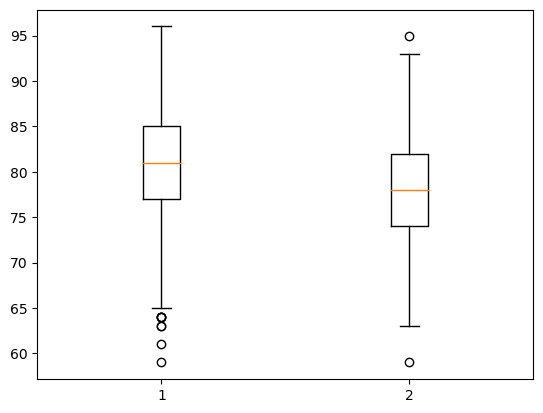

In [128]:
av_score_no_job=scores[scores.part_time_job==False].average_score
av_score_job=scores[scores.part_time_job==True].average_score


plt.boxplot([av_score_no_job,av_score_job])
plt.show()

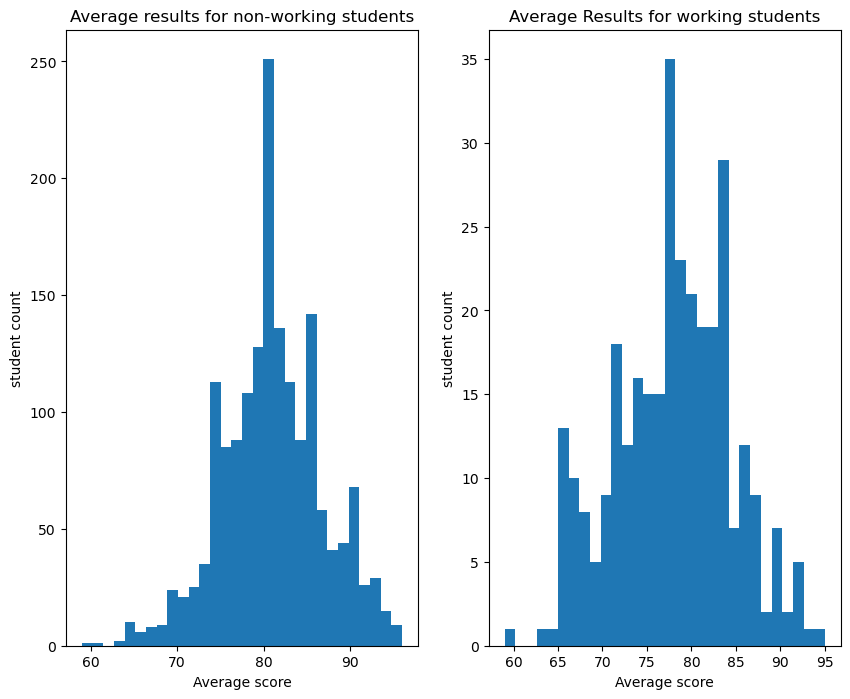

33.864178673700785
43.183363471971084
81.0
78.0


In [129]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.hist(av_score_no_job,bins=30)
plt.xlabel('Average score')
plt.ylabel('student count')
plt.title('Average results for non-working students')

plt.subplot(1,2,2)
plt.hist(av_score_job,bins=30)
plt.xlabel('Average score')
plt.ylabel('student count')
plt.title('Average Results for working students')


plt.show()

print(av_score_no_job.var())
print(av_score_job.var())

print(av_score_no_job.median())
print(av_score_job.median())

<p>While the data us normally distributed, the variances differ, so we choosr to perform Welch's t-test. The resulting p-value indicates that there is a significant difference in scores for working and non-working students. It sounds not that surprising -- the job can very much affect the students' performance.</p>

In [130]:


t_stat, p_value = stats.ttest_ind(av_score_no_job, av_score_job, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 7.9782189066244005
P-value: 1.478325276566215e-14


<p>Finally, it would be interesting to see if students with certain career aspirations are likely to show higher results on average than their peers. So, we regroup the data according to the career aspirations indicated and apply a square root transformation to the data. Next step is to pick a smaller set of career choices that would satisfy normality assumption. To do that we use the Shapiro test.</p>

In [131]:



careers=[]
scores['las'] = np.power(scores['average_score'],0.5) #square root transformation of the average score
# Check normality for each group
for aspiration in scores['career_aspiration'].unique():
    stat, p = shapiro(scores.loc[scores['career_aspiration'] == aspiration, 'las'])
    if p > 0.05:
        print(f"Career aspiration: {aspiration}, Statistics={stat}, p={p}")
        careers.append(aspiration)
        

print(careers)  


Career aspiration: Lawyer, Statistics=0.982662558555603, p=0.07735589891672134
Career aspiration: Government Officer, Statistics=0.9820417165756226, p=0.5093589425086975
Career aspiration: Artist, Statistics=0.991631269454956, p=0.9352357983589172
Career aspiration: Teacher, Statistics=0.9793664813041687, p=0.4136694669723511
Career aspiration: Scientist, Statistics=0.9819124341011047, p=0.7721412777900696
Career aspiration: Banker, Statistics=0.9906570911407471, p=0.3356139659881592
Career aspiration: Writer, Statistics=0.9628537893295288, p=0.32813283801078796
Career aspiration: Accountant, Statistics=0.9816023707389832, p=0.08444199711084366
Career aspiration: Designer, Statistics=0.9694881439208984, p=0.1665436029434204
Career aspiration: Construction Engineer, Statistics=0.9692947864532471, p=0.09159968793392181
Career aspiration: Game Developer, Statistics=0.9848348498344421, p=0.6303982138633728
Career aspiration: Stock Investor, Statistics=0.9807140827178955, p=0.32699608802795

<p>Now let us plot the boxplots for the chosen list of careers...</p>

/var/folders/2n/qqhz7_j55sl3b2tb1_653_2w0000gn/T/ipykernel_38983/1927209876.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(careers)


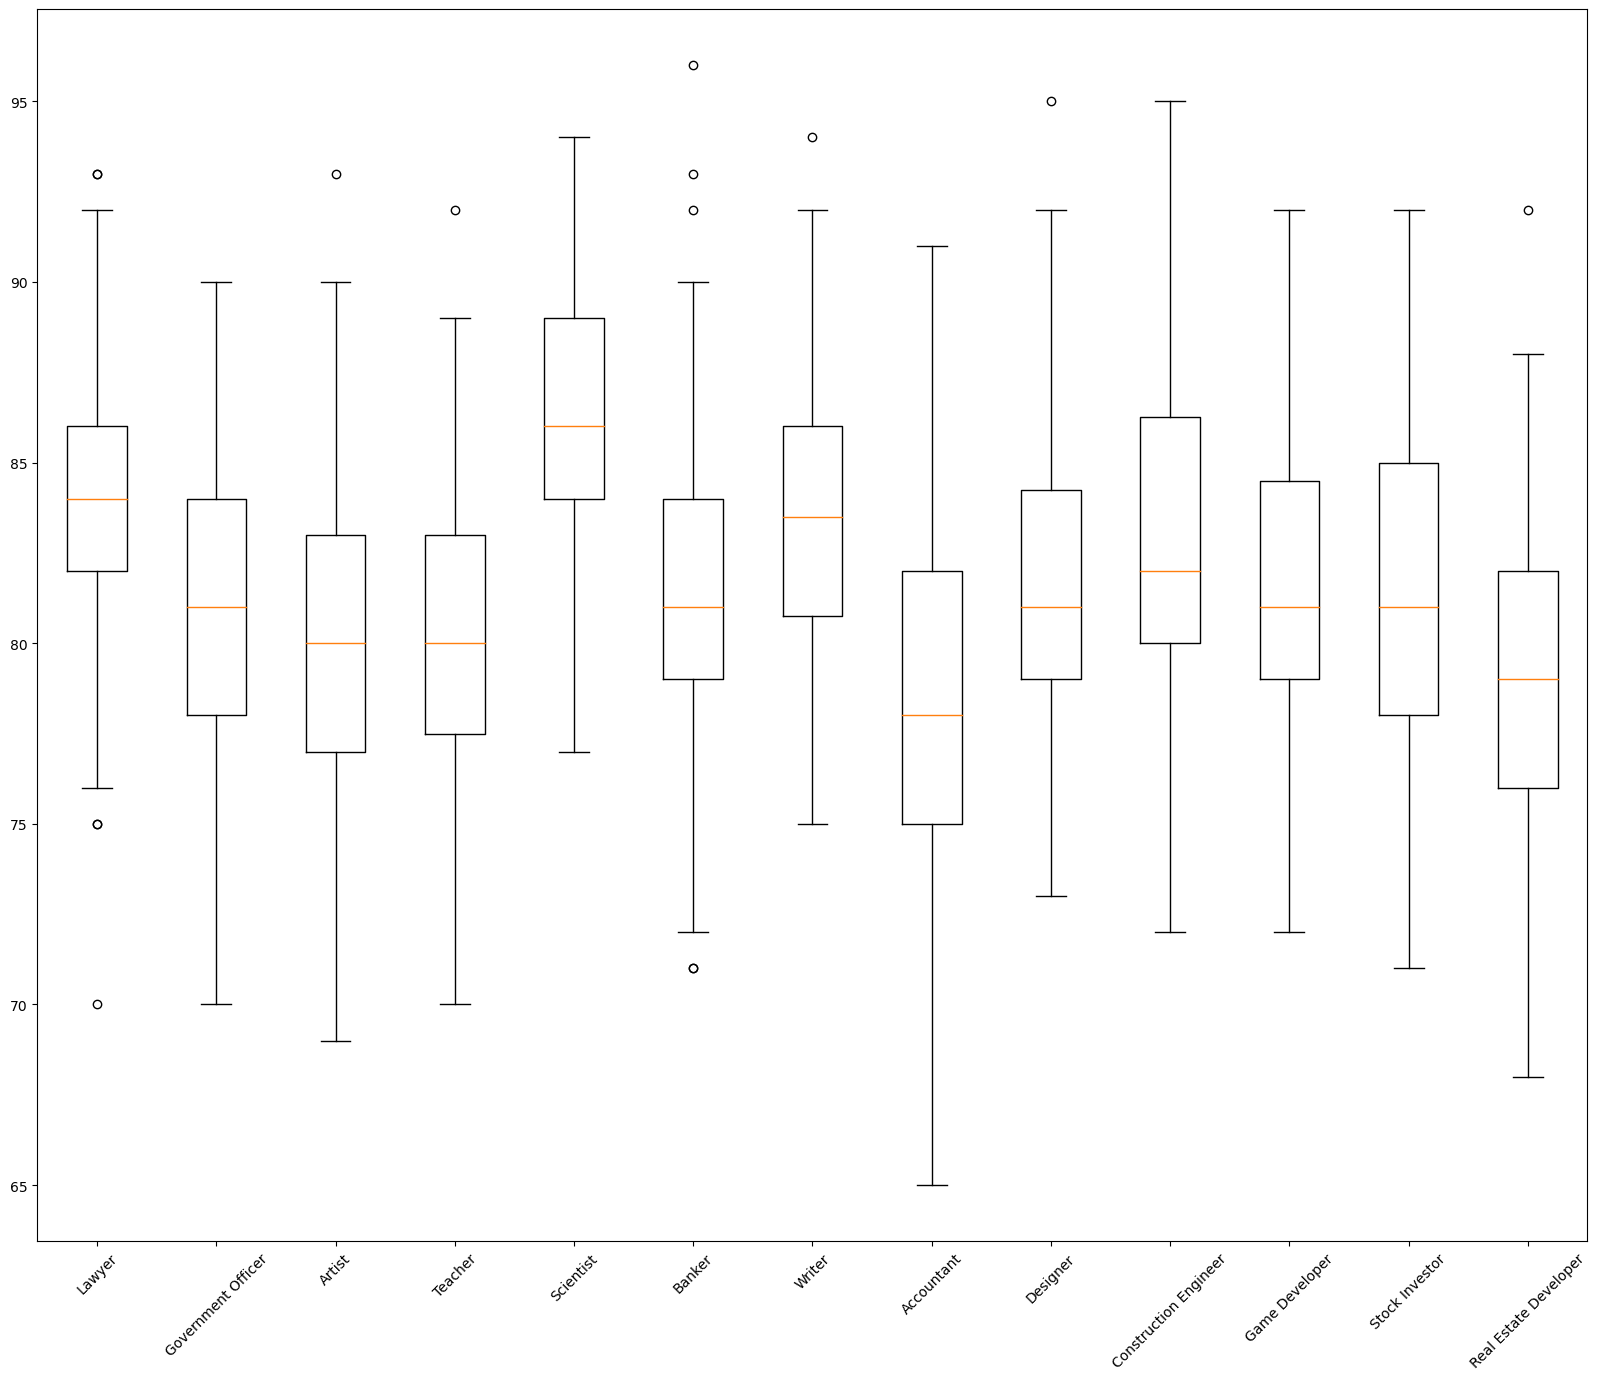

In [132]:
plot_list=[]
for career in careers:
    score_data=scores[scores.career_aspiration==career].average_score
    plot_list.append(score_data)


plt.figure(figsize=(20,16))
ax=plt.subplot()
ax.set_xticklabels(careers)
plt.xticks( rotation=45) 
plt.boxplot(plot_list)
plt.show()

<p>Levene's test helps us to check whether for the picked career aspirations the variances are equal. It is the case, so we will be able to proceed with ANOVA test.</p>

In [133]:


# Group the data by 'career_aspirations' and extract 'scores'
scores_small = scores.loc[scores['career_aspiration'].isin(careers)]
grouped = [group['las'].values for name, group in scores_small.groupby('career_aspiration')]

stat, p = levene(*grouped)
print(f"Statistics={stat}, p={p}")
if p > 0.05:
    print("Probably equal variances")
else:
    print("Probably unequal variances")

Statistics=1.5331805287835438, p=0.10621721566627633
Probably equal variances


<p>ANOVA test shows that there is likely a statistically significant difference in average scores of students pursuing different careers. A pairwise Tukey's test helps to indicate for which pairs of careers that is the case. Since there are many of those, let us restrict career list even more. For instance, let us do the test for "Scientist", "Artist", "Government officer" and "Real Estate Developer".</p>

In [134]:


grouped = [group['las'].values for name, group in scores_small.groupby('career_aspiration')]

f_stat, p_value = f_oneway(*grouped)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")




F-statistic: 13.964096404198521
P-value: 3.5755641229005206e-27


<p>The Tukey test has shown that there is indeed a statistically significant difference between average scores of the students wishing to be scientists and their peers wishing to be artists, government officers or real estate developer. An interested reader might as well modify the career list and compare more career choices. We, however, conclude our project here.</p>

In [135]:


careers_small=["Scientist","Artist",'Government Officer',"Real Estate Developer"]
scores_small=scores_small[scores_small.career_aspiration.isin(careers_small)]
display(scores_small.career_aspiration.unique())

tukey_results = pairwise_tukeyhsd(endog=scores_small['average_score'], groups=scores_small['career_aspiration'], alpha=0.05)            
# Print the results
print(tukey_results)


array(['Government Officer', 'Artist', 'Scientist',
       'Real Estate Developer'], dtype=object)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
        group1                group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------
               Artist    Government Officer   0.2814 0.9857 -1.8222  2.385  False
               Artist Real Estate Developer  -1.2663 0.3376 -3.2185 0.6859  False
               Artist             Scientist   5.9085    0.0  3.5144 8.3026   True
   Government Officer Real Estate Developer  -1.5477 0.1919 -3.5523  0.457  False
   Government Officer             Scientist   5.6272    0.0  3.1901 8.0642   True
Real Estate Developer             Scientist   7.1749    0.0  4.8672 9.4825   True
---------------------------------------------------------------------------------


<h2>Conclusion</h2>

<p>Within the framework of this project we have explored the dataset containing student results and have looked at possible ways different factors may influence them. In particular, we looked into career tastes and average performance of female and male students, used statistical tests to compare the results of students with and without part-time jobs and have looked into possible relations between career aspirations and average results.</p>

<p>There are, of course, a lot more interesting questions one can try to answer using this data, which we leave for the future. For instance, whether extracurricular activities affect the studies, or whether more absences lead to significantly worse results, or whether certain career aspirations are related to higher scores for certain disciplines, or whether the scores for various disciplines (say, Mathematics and Physics) are related in any way.</p>